# 3 数组-找出数组中重复的数字

In [ ]:
bool duplicate(int numbers[], int length, int* duplication)
{
	// 判断数组不为空
	if (numbers == NULL || length <= 0) { return false; }
    
	// 判断数值在制定范围内
	for (int i = 0;i < length;i++)
	{
		if (numbers[i] < 0 || numbers[i]>length - 1)
			return false;
	}
    
	// 从位置0开始交换
	for (int i = 0;i < length;i++)
	{
		while (numbers[i] != i)
		{
			if (numbers[i] == numbers[numbers[i]])
			{
				*duplication = numbers[i];
				return true;
			}
			swap(numbers[i], numbers[numbers[i]]);
		}
	}
	return false;
}

# 3.1 数组-不修改数组找重复数字
* 利用二分法进行数组分割

In [ ]:
int countRange(const int* numbers, int length, int start, int end);

// 参数:
//        numbers:     一个整数数组
//        length:      数组的长度
// 返回值:             
//        正数  - 输入有效，并且数组中存在重复的数字，返回值为重复的数字
//        负数  - 输入无效，或者数组中没有重复的数字
int getDuplication(const int* numbers, int length)
{
    if(numbers == nullptr || length <= 0)
        return -1;

    int start = 1;
    int end = length - 1;
    while(end >= start)
    {
        int middle = ((end - start) >> 1) + start;
        int count = countRange(numbers, length, start, middle);
        if(end == start)
        {
            if(count > 1)
                return start;
            else
                break;
        }

        if(count > (middle - start + 1))
            end = middle;
        else
            start = middle + 1;
    }
    return -1;
}

int countRange(const int* numbers, int length, int start, int end)
{
    if(numbers == nullptr)
        return 0;

    int count = 0;
    for(int i = 0; i < length; i++)
        if(numbers[i] >= start && numbers[i] <= end)
            ++count;
    return count;
}

# 3.2 找出没有重复的数字
* 利用位运算--异或

In [ ]:
int find(int[] arr)
{
    int tmp = arr[0];
    for(int i = 1;i < arr.length; i++){
        tmp = tmp ^ arr[i];
    }
    return tmp;
}

# 4 数组-二维数组中的查找
* 数组由左到右 和 由上到下 均为**递增**；查找某个数
* 以数组的右上角或者左下角为突破口

In [ ]:
bool fintTarget(int* matrix, int target,int row,int column)
{
    // 判断在数的范围内
    if (target<matrix[0][0] || target>matrix[row][column]) return false;
	int row_a = 0, column_a = column - 1;
	
    // 比右上角的数大，则到下一行，否则换到前一列
    while (row_a < row && column >= 0)
	{
		if (matrix[row_a][column_a] == target) return true;
		else if (matrix[row_a][column_a] > target) column_a--;
		else row_a++;
	}
	return false;
}

# 5 字符串-替换空格
* 双指针，一个指向末尾，一个指向拓展后的末尾

In [ ]:
	void replaceSpace(char *str,int length) 
    {
        //判断数据不为空
        if(str == NULL||length<=0)  return;
        //拓展数据长度
        int true_length=0,count_blank=0;
        int i=0;
        while(str[i]!='\0')
        {
            true_length++;
            if(str[i]==' ')
                count_blank++;
            i++;
        }
        //计算拓展后的字符串长度，判断是否在length范围内
        int new_length=true_length+2*count_blank;
        if(new_length>length) return;
        
        //后移，替换
        int a_pointer=true_length;
        int b_pointer=new_length;
        
        while(a_pointer>=0 && a_pointer<b_pointer)
        {
            if(str[a_pointer]!=' ')
            {
                str[b_pointer]=str[a_pointer];
                a_pointer--;
                b_pointer--;
            }
            else
            {
                a_pointer--;
                str[b_pointer--]='0';
                str[b_pointer--]='2';
                str[b_pointer--]='%';
            }
        }
	};

# 6 链表-在链表结尾添加一个节点

In [ ]:
// 单向链表节点定义
struct ListNode
{
	int       L_value;
	ListNode* L_next;
};

// 添加节点
void AddToTail(ListNode**pHead,int value)
{
	ListNode* pNew = new ListNode();
	pNew->L_value = value;
	pNew->L_next = NULL;
    
    //判断首节点是不是空节点
	if (*pHead == NULL)
	{
		*pHead = pNew;
	}
	else
	{
		ListNode* pNode = *pHead;
		while (pNode->L_next != NULL)
			pNode = pNode->L_next;
		pNode->L_next = pNew;
	}
}

# 6.1 链表-删除某个节点

In [ ]:
void Remove(ListNode**pHead,int value)
{
	ListNode* pNew = new ListNode();
	pNew->L_value = value;
	pNew->L_next = NULL;

	if (*pHead == NULL||pHead==NULL)
	{
		return;
	}
	//用来存放待删除的节点
	ListNode*toBedeleted = NULL;
	if ((*pHead)->L_value == value)
	{
		toBedeleted = *pHead;
		*pHead = (*pHead)->L_next;
	}
	else
	{
		ListNode* pNode = (*pHead)->L_next;
		while (pNode != NULL && pNode->L_value != value)
			pNode = pNode->L_next;
		if (pNode != NULL)
		{
			toBedeleted = pNode;
			pNode->L_next = pNode->L_next->L_next;
		}
	}
	if (toBedeleted != NULL)
	{
		delete toBedeleted;
		toBedeleted = NULL;
	}
}

# 6.2 链表-从尾到头打印链表
* 先进后出的情况，用**栈**来实现

In [ ]:
// 循环访问的方法
void PrintValueReverse(ListNode*pHead)
{
	// 声明nodes的栈
	stack<int>nodes;
	ListNode* pNode = pHead;
	while (pNode != NULL)
	{
		nodes.push(pNode->L_value);
		pNode = pNode->L_next;
	}
	
	//输出nodes
	while (nodes.empty())
	{
		cout << nodes.top();
		nodes.pop();
	}
}

// 递归的方法
void PrintValueReverse(ListNode*pHead)
{
	if (pHead!= NULL)
	{
		if (pHead->L_next != NULL)
		{
			PrintValueReverse(pHead->L_next);
		}
		cout << pHead->L_value;
	}
	
}

# 7 树-重建二叉树
[参考](https://www.cnblogs.com/zywu/p/5758917.html)

In [ ]:
class Solution {
public:
	TreeNode* reConstructBinaryTree(vector<int> pre, vector<int> in)
	{
		// 检查输入的正确性
		if (pre.empty() || in.empty() || pre.size() != in.size())
			return NULL;
		return construct(pre, 0,pre.size() - 1, in,0,pre.size()-1);
	}
public:
	TreeNode* construct(vector<int> pre,int ps,int pe, vector<int> in,int is,int ie)
	{
		if (ps > pe) return NULL;

		// 取前序遍历第一个是根节点
		int value = pre[ps];
		// 在中序中找根节点
		int i = 0;
		while (i <= ie && in[i] != value)
		{
			i++;
		}
		// 如果没有找到，则输入不合法，抛出异常
		if (i > ie) return NULL;
		// 创建当前根节点，并赋值
		TreeNode* FinalTree = new TreeNode(value);
		// 递归调用当前节点的左子树
		FinalTree->left = construct(pre, ps + 1, ps + i - is, in, is, i - 1);
		// 递归当前调用节点的右子树
		FinalTree->right = construct(pre, ps + i - is + 1, pe, in, i + 1, ie);

		return FinalTree;
	}
};

# 8 树-二叉树的下一个节点
1. 如果节点有右子节点，则右子节点的最左节点是该节点的下一个节点
1. 如果节点无右子节点，但该节点是其父节点的左子节点，则父节点是该节点的下一个节点
1. 如果节点无右子节点，且该节点是其父节点的右子节点，则沿着父节点向上遍历，满足XXX的父节点是其该节点的下一个节点

In [ ]:
	TreeNode* GetNext(TreeNode* pNode)
	{
		TreeNode* pNext = NULL;

		// 有右子树
		if (pNode->right != NULL)
		{
			if ((pNode->right->left) != NULL)
				pNext = pNode->right->left;
			else pNext = pNode->right;
		}
		//无右子树，有父节点
		else if (pNode->par != NULL)
		{
			TreeNode*pCurrent = pNode;
			TreeNode*pParent = pNode->par;
			while (pParent != NULL && pParent->right == pCurrent)
			{
				pCurrent = pParent;
				pParent = pCurrent->par;
			}
			pNext = pParent;
		}
		return pNext;
	}

# 9 栈和队列-用两个栈实现队列
* 先将树压入第一个栈
* 将第一个栈元素pop出，push进第二个栈
* 第二个栈就是队列的顺序

In [ ]:
    void push(int node) 
    {
        int temple;
        while(!stack2.empty())
        {
            temple=stack2.top();
            stack2.pop();
            stack1.push(temple);
        }
        stack1.push(node);
    }

    int pop() 
    {
        int temple;
        while(!stack1.empty())
        {
            temple=stack1.top();
            stack1.pop();
            stack2.push(temple);
        }
        temple=stack2.top();
        stack2.pop();
        return temple;
    }

# 10 斐波那契数
* 循环方法实现计算
    * 时间复杂度**O(n)**
* [青蛙跳台阶问题](https://www.jianshu.com/p/965d12083d7f)
    * 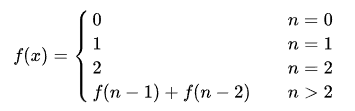

In [ ]:
long long Fibonacci(unsigned n)
{
	int result[2] = { 0,1 };
	if (n < 2)
		return result[n];

	long long fibFront = 0;
	long long fibBack = 1;
	long long fibN = 0;
	for (unsigned int i = 2;i <= n;i++)
	{
		fibN = fibFront + fibBack;

		fibFront = fibBack;
		fibBack = fibN;
	}
	return fibN;
}

# 排序-快排
1. 指定最左端的数为 **pivot**
1. 左指针找第一个大于 pivot 的数
1. 右指针找第一个小于 pivot 的数
1. 交换两个数
1. 大于begin的数都在右，小于的都在左

In [ ]:
void QuickSort(vector<int> &a,int left,int right)
{
	int i = left;
	int j = right;
	int pivot = a[i];
	while (i <= j)
	{
		while (a[i] < pivot) { i++;}
		while (a[j] > pivot) { j--;}
		if (i <= j)
		{
			swap(a[i], a[j]);
			i++;
			j--;
		}
	}
	if (i < right) QuickSort(a, i, right);
	if (j > left) QuickSort(a, left, j);
}

# 排序-归并
1. 递归
1. 合并两个数组的函数
1. 二分排序

In [ ]:
void Merge(vector<int> &a, int l, int m, int r)
{
	// 获取左右部分数组的大小（实际还是原数组）
	int l_c = m - l + 1;
	int r_c = r - m;
	
	// 将数组值赋给临时数组（两个数组）
	int i, j, k;
	vector<int> L(l_c + 1);
	vector<int> R(r_c + 1);
	for (i = 0;i < l_c;i++)
		L[i] = a[l + i];
	for (j = 0;j < r_c;j++)
		R[j] = a[m + 1 + j];

	// 每个数组的最后一个数赋值11111111,任意数与之比较都小
	L[l_c] = 11111111;
	R[r_c] = 11111111;

	//
	for (i = 0, j = 0, k = l;k <= r;k++)
	{
		if (L[i] < R[j])
			a[k] = L[i++];
		else
			a[k] = R[j++];
	}
}


void MergeSort(vector<int> &a, int l, int r)
{
	if (l < r)
	{
		int m = (l + r) / 2;
		MergeSort(a, l, m);
		MergeSort(a, m + 1, r);
		Merge(a, l, m, r);
	}
}

# 排序-堆排
1. 原则
>1. 符合完全二叉树
>1. 父节点大于孩子节点
1. 步骤
>1. 构建最大堆--插入构建
>1. 删除首个->下面的顺次移位

In [ ]:
void insert_p(vector<int> &a, int p)
{
	while (p > 0)
	{
		int parent = (p - 1) / 2;
		if (a[parent] < a[p])
        // if(a[parent] > a[p])
		{
			swap(a[parent], a[p]);
			p = parent;
		}
		else break;
	}
}

void delete_max(vector<int> &a, int length)
{
	int tmp = a[0];
	int index = 0;

	// 找出最大的
	// large指向已遍历的最大值
	// index指向当前空缺位置
	while (1)
	{
		int left = 2 * index + 1;
		int right = 2 * index + 2;
		
		if (left >= length)
			break;
		else 
		{
			int large = a[left] > a[right] ? left : right;
			a[index] = a[large];
			index = large;
		}
	}
	a[index] = a[length];
	a[length] = tmp;

}

void HeapSort(vector<int> &a)
{
	for (int i = 0;i < a.size();i++)
		insert_p(a, i);
	for (int i = a.size() - 1;i > 0;i--)
		delete_max(a, i);
}

# 11 查找-找出旋转数组的最小数字
1. 二分法、双指针
2. 中间与左、右的值都相等时，采用**顺序遍历** MinInOrder

In [ ]:
int MinInOrder(vector<int> &a, int left, int right)
{
	int result = a[left];
	for (int i = left + 1;i <= right;i++)
	{
		if (result > a[i])
			result = a[i];
	}
	return result;
}

int FindMin_Rotate(vector<int> &a)
{
	int left = 0;
	int right = a.size() - 1;
	int mid = 0;
	while (a[left] >= a[right])
	{
		if (right - left == 1)
		{
			mid = right;
			break;
		}

		mid = (left + right) / 2;
		// 若left、mid、right三个指针指的数都相同，则用顺序查找
		if (a[left] == a[right] && a[left] == a[mid])
			return MinInOrder(a, left, right);

		if (a[mid] >= a[left])
			left = mid;
		else if (a[mid] <= a[right])
			right = mid;
	}
	return a[mid];	
}

# 12 回溯法-矩阵中的路径
* 判断数组中是否含有相应字符串

In [ ]:
bool haspath(char* matrix, int rows, int cols,char* str)
{
	// 判断二维数组是否合法
	if (matrix == NULL || rows < 0 || cols < 0)
		return false;

	// 创建访问标志的数组,置为0/false
	bool* visited = new bool[rows*cols];
	memset(visited, 0, rows*cols);

	int pathLength = 0;
	// 在二维数组内循环
	for (int row = 0;row < rows;row++)
	{
		for (int col = 0;col < cols;col++)
		{
			if (haspathcore)
				return true;
		}
	}

	delete[] visited;
	return false;
}

bool haspathcore(char* matrix, int rows, int cols, int row, int col, char* str, int& pathLength, bool* visited)
{
	// 读取到str最后，则返回true
	if (str[pathLength] == '\0')
		return true;

	bool haspath = false;

	if (row >= 0 && row < rows && col >= 0 && col < cols
		&&matrix[row*cols + col] == str[pathLength] 
		&& !visited[row*cols + col])
	{
		pathLength++;
		visited[row*cols + col] = true;
		// 在其上下左右四个方向查找
		haspath = haspathcore(matrix, rows, cols, row - 1, col, str, pathLength, visited)
			|| haspathcore(matrix, rows, cols, row, col - 1, str, pathLength, visited)
			|| haspathcore(matrix, rows, cols, row + 1, col, str, pathLength, visited)
			|| haspathcore(matrix, rows, cols, row, col + 1, str, pathLength, visited);

		if (!haspath)
		{
			--pathLength;
			visited[row*cols + col] = false;
		}
	}
	return haspath;
}

# 14 动态规划-剪绳子
1. 至少被分成2段
2. 求各段最大乘积
3. 动态规划
4. 贪心算法，n>=5时，讨论情况 O(1)

In [ ]:
# 动态规划
int max_cut(int length)
{
	// 排除三个特殊示例
	if (length < 2)
		return 0;
	if (length == 2)
		return 1;
	if (length == 3)
		return 2;

	// 初始化新的数组
	int* arr = new int[length + 1];
	arr[0] = 0;
	arr[1] = 1;
	arr[2] = 2;
	arr[3] = 3;

	int max=0;
	for (int i = 4;i <=length;i++)
	{
		max = 0;
		for (int j = 0;j < i / 2;j++)
		{   
			// 寻找最大
			int count = arr[j] * arr[i - j];
			if (max < arr[i])
				max = arr[i];

			arr[i] = max;
		}
	}
	return arr[length];
}

# 贪心算法
int max1_cut(int length)
{
	// 排除三个特殊示例
	if (length < 2)
		return 0;
	if (length == 2)
		return 1;
	if (length == 3)
		return 2;

	// 能够减3的次数
	int count_3 = length / 3;

	// 余数为1时，则少减一次，4=2*2
	if (length % 3 == 1)
		count_3--;

	// 能够除以2的次数
	int count_2 = (length - count_3) / 2;

	int max = pow(3, count_3)*pow(2, count_2);
	return max;
}

# 15 位运算-二进制中1的个数

In [ ]:
int count_1(int n)
{
	int count = 0;
	while (n)
	{
		count++;
		n = n & (n - 1);
	}
	return count;
}